<a href="https://colab.research.google.com/github/rakeshgovindsuresh/Python-Practice/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load your data
file_path ='/content/Raw_data_1Hr_2023_site_288_Velachery_Res._Area_Chennai_CPCB_1Hr (1).csv'

In [3]:
df = pd.read_csv(file_path)
df.describe()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
count,7973.000000,7947.000000,8274.000000,8292.000000,8293.000000,8263.000000,7469.000000,8697.000000,8152.000000,7370.000000,...,7355.000000,0.0,8707.000000,8707.000000,8707.000000,0.0,0.0,5794.000000,8707.000000,8707.000000
mean,27.378806,64.228514,4.630029,20.418979,25.035350,11.093191,19.548847,0.735717,32.301283,0.463858,...,0.308548,NaN,76.290942,1.743988,193.585882,NaN,NaN,119.366165,1006.614149,-0.485019
std,18.093457,51.739076,6.463143,15.409832,19.318278,6.943443,26.027317,0.502356,29.316496,0.174497,...,0.101008,NaN,16.180808,0.317540,68.989816,NaN,NaN,193.033613,4.884281,0.017203
min,0.010000,5.520000,0.015000,0.010000,0.000000,0.010000,0.015000,0.000000,0.010000,0.000000,...,0.042500,NaN,25.190000,0.592500,0.085000,NaN,NaN,0.010000,800.000000,-0.502500
25%,19.410000,41.405000,2.300000,9.804583,12.247500,7.047500,6.452500,0.412500,12.380000,0.445000,...,0.292500,NaN,63.912500,1.527500,150.265000,NaN,NaN,1.580000,1003.625000,-0.500000
50%,25.690000,54.462500,2.772500,14.995000,17.510000,9.167500,8.890000,0.685000,24.776250,0.500000,...,0.300000,NaN,80.757500,1.860000,192.345000,NaN,NaN,26.877500,1006.475000,-0.490000
75%,33.165000,75.832500,4.469375,27.011250,32.142500,13.710000,24.545000,0.915000,44.316875,0.502500,...,0.307500,NaN,91.157500,1.983333,235.730000,NaN,NaN,140.483125,1009.625000,-0.475000
max,767.735000,972.940000,82.015000,145.485000,156.930000,121.155000,180.492500,9.880000,199.440000,2.272500,...,1.530000,NaN,99.840000,2.517500,354.000000,NaN,NaN,918.605000,1016.550000,-0.392500


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [5]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'


In [6]:
df['Season'] = df['Timestamp'].dt.month.apply(get_season)
print(df['Season'])

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Winter
8756    Winter
8757    Winter
8758    Winter
8759    Winter
Name: Season, Length: 8760, dtype: object


In [7]:
ms = df.isnull().sum()
ms_percentage = (df.isnull().sum()/(len(df)))*100
Missing_Data_Info = pd.DataFrame({'Total Missings': ms, 'Percentage': ms_percentage})
print(Missing_Data_Info)


                     Total Missings  Percentage
Timestamp                         0    0.000000
PM2.5 (µg/m³)                   787    8.984018
PM10 (µg/m³)                    813    9.280822
NO (µg/m³)                      486    5.547945
NO2 (µg/m³)                     468    5.342466
NOx (ppb)                       467    5.331050
NH3 (µg/m³)                     497    5.673516
SO2 (µg/m³)                    1291   14.737443
CO (mg/m³)                       63    0.719178
Ozone (µg/m³)                   608    6.940639
Benzene (µg/m³)                1390   15.867580
Toluene (µg/m³)                1390   15.867580
Xylene (µg/m³)                 8760  100.000000
O Xylene (µg/m³)               8760  100.000000
Eth-Benzene (µg/m³)            1401   15.993151
MP-Xylene (µg/m³)              1405   16.038813
AT (°C)                        8760  100.000000
RH (%)                           53    0.605023
WS (m/s)                         53    0.605023
WD (deg)                         53    0

In [8]:
df=df.drop(['TOT-RF (mm)','RF (mm)','AT (°C)','O Xylene (µg/m³)','Xylene (µg/m³)'],axis=1)

In [9]:
ms = df.isnull().sum()
ms_percentage = (df.isnull().sum()/(len(df)))*100
Missing_Data_Info = pd.DataFrame({'Total Missings': ms, 'Percentage': ms_percentage})
print(Missing_Data_Info)

                     Total Missings  Percentage
Timestamp                         0    0.000000
PM2.5 (µg/m³)                   787    8.984018
PM10 (µg/m³)                    813    9.280822
NO (µg/m³)                      486    5.547945
NO2 (µg/m³)                     468    5.342466
NOx (ppb)                       467    5.331050
NH3 (µg/m³)                     497    5.673516
SO2 (µg/m³)                    1291   14.737443
CO (mg/m³)                       63    0.719178
Ozone (µg/m³)                   608    6.940639
Benzene (µg/m³)                1390   15.867580
Toluene (µg/m³)                1390   15.867580
Eth-Benzene (µg/m³)            1401   15.993151
MP-Xylene (µg/m³)              1405   16.038813
RH (%)                           53    0.605023
WS (m/s)                         53    0.605023
WD (deg)                         53    0.605023
SR (W/mt2)                     2966   33.858447
BP (mmHg)                        53    0.605023
VWS (m/s)                        53    0

In [10]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Ensuring we're only imputing numeric columns
        df[column].fillna(df[column].mean(), inplace=True)
        print(df.isna().sum())

Timestamp                 0
PM2.5 (µg/m³)             0
PM10 (µg/m³)            813
NO (µg/m³)              486
NO2 (µg/m³)             468
NOx (ppb)               467
NH3 (µg/m³)             497
SO2 (µg/m³)            1291
CO (mg/m³)               63
Ozone (µg/m³)           608
Benzene (µg/m³)        1390
Toluene (µg/m³)        1390
Eth-Benzene (µg/m³)    1401
MP-Xylene (µg/m³)      1405
RH (%)                   53
WS (m/s)                 53
WD (deg)                 53
SR (W/mt2)             2966
BP (mmHg)                53
VWS (m/s)                53
Season                    0
dtype: int64
Timestamp                 0
PM2.5 (µg/m³)             0
PM10 (µg/m³)              0
NO (µg/m³)              486
NO2 (µg/m³)             468
NOx (ppb)               467
NH3 (µg/m³)             497
SO2 (µg/m³)            1291
CO (mg/m³)               63
Ozone (µg/m³)           608
Benzene (µg/m³)        1390
Toluene (µg/m³)        1390
Eth-Benzene (µg/m³)    1401
MP-Xylene (µg/m³)      1405
RH (%) 

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Example: Clustering for Summer data
summer_data = df[df['Season'] == 'Summer']

# Selecting columns to include in the clustering (update with your actual columns)
features = summer_data[['PM2.5 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'WD (deg)', 'WS (m/s)']]
features = StandardScaler().fit_transform(features)  # Standardize features for better results with DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples can be adjusted based on domain knowledge or experimentation
clusters = dbscan.fit_predict(features)

# Adding the cluster labels to your data
summer_data['Cluster'] = clusters


<ipython-input-11-e2db6039fcb3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['Cluster'] = clusters


In [12]:
print(summer_data['Cluster'].value_counts())

Cluster
 2    1335
-1     566
 0     238
 7      25
 1      10
 5       9
 4       8
 6       8
 8       5
 3       4
Name: count, dtype: int64


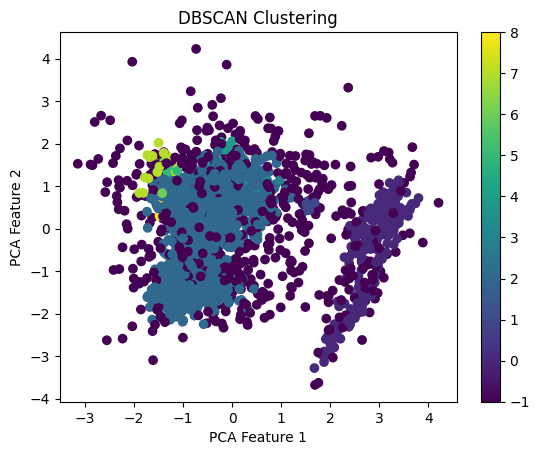

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Plot
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=summer_data['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

# You already have 'features' standardized and 'clusters' from DBSCAN
if len(set(clusters)) > 1:  # Check if there's more than one cluster (excluding noise)
    score = silhouette_score(features, clusters)
    print("Silhouette Score: ", score)
else:
    print("Not enough clusters to calculate Silhouette Score.")


Silhouette Score:  -0.14042016313363515


In [15]:
noise_ratio = sum(clusters == -1) / len(clusters)
print(f"Noise Ratio: {noise_ratio:.2f}")

Noise Ratio: 0.26
